In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Salt-and-pepper noise

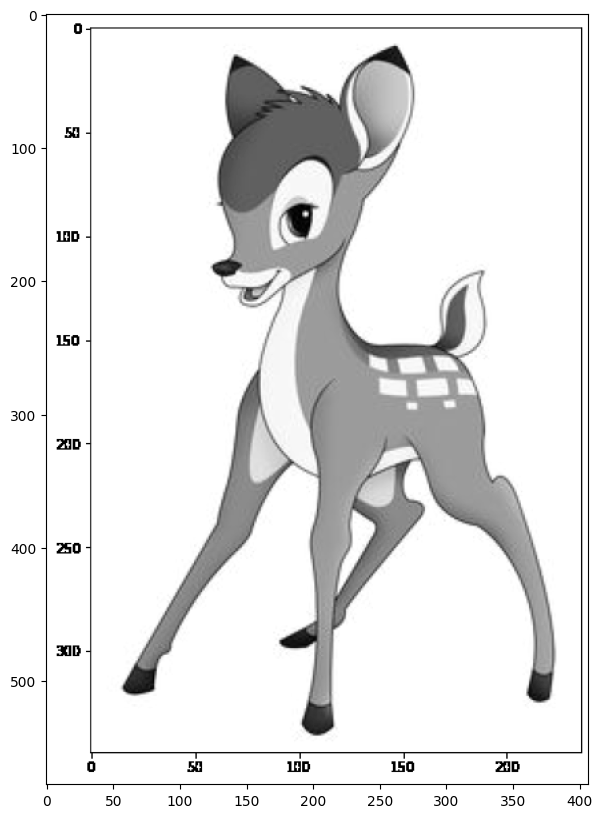

In [22]:
im = cv.imread('data/bambi.png',0).astype(np.uint8)

plt.figure(figsize=(10,10))
plt.imshow(im, cmap='gray');

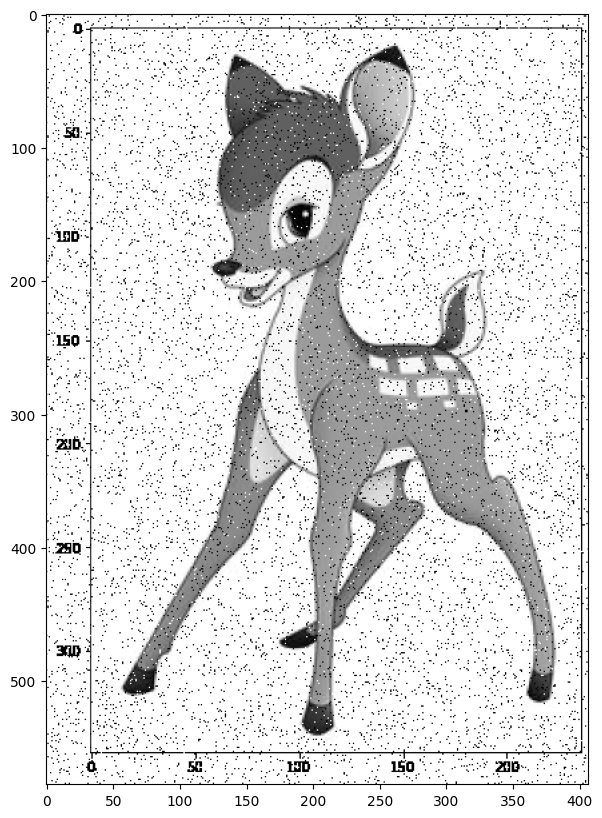

In [23]:
# Lets add some salt and pepper noise
black = 10
white = 250
mask = np.empty(im.shape, np.uint8)
mask = cv.randu(mask, 0, 255)
im[mask < black] = 0
im[mask > white] = 255

plt.figure(figsize=(10,10))
plt.imshow(im, cmap='gray');

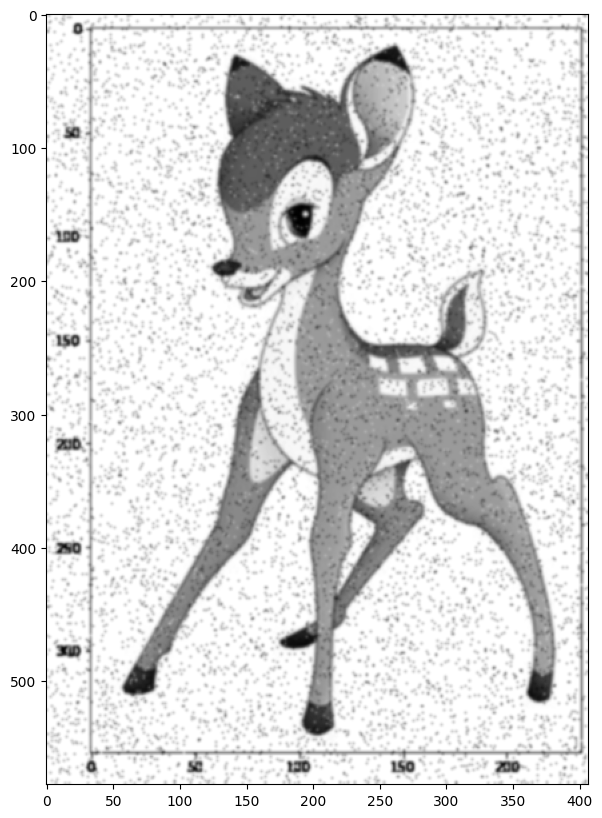

In [24]:
# Gaussian smoothing to get rid of salt-and-pepper noise
half_width = 2
sigma = 1

plt.figure(figsize=(10,10))
plt.imshow(cv.GaussianBlur(im, (2*half_width+1, 2*half_width+1), sigma), cmap='gray');

In [25]:
# Median filtering
# Median filtering in 1D

In [26]:
x = np.random.rand(10)*255
x = x.astype(np.uint8)
print(f'x = {x}')

x = [ 69 226 244  89 103  24 229  63  51 227]


In [27]:
# Picking values around i
half_width = 2
s = half_width
e = len(x)-half_width

for i in range(s,e):
    print(f'center = {i}, values={x[i-half_width:i+half_width+1]}')

center = 2, values=[ 69 226 244  89 103]
center = 3, values=[226 244  89 103  24]
center = 4, values=[244  89 103  24 229]
center = 5, values=[ 89 103  24 229  63]
center = 6, values=[103  24 229  63  51]
center = 7, values=[ 24 229  63  51 227]


In [28]:
# Picking median values for i using its neighbourhood
result = np.copy(x)
for i in range(s,e):
    neighbourhood = x[i-half_width:i+half_width+1]
    result[i] = np.median(neighbourhood)
    
print(f'result = {result}')

result = [ 69 226 103 103 103  89  63  63  51 227]


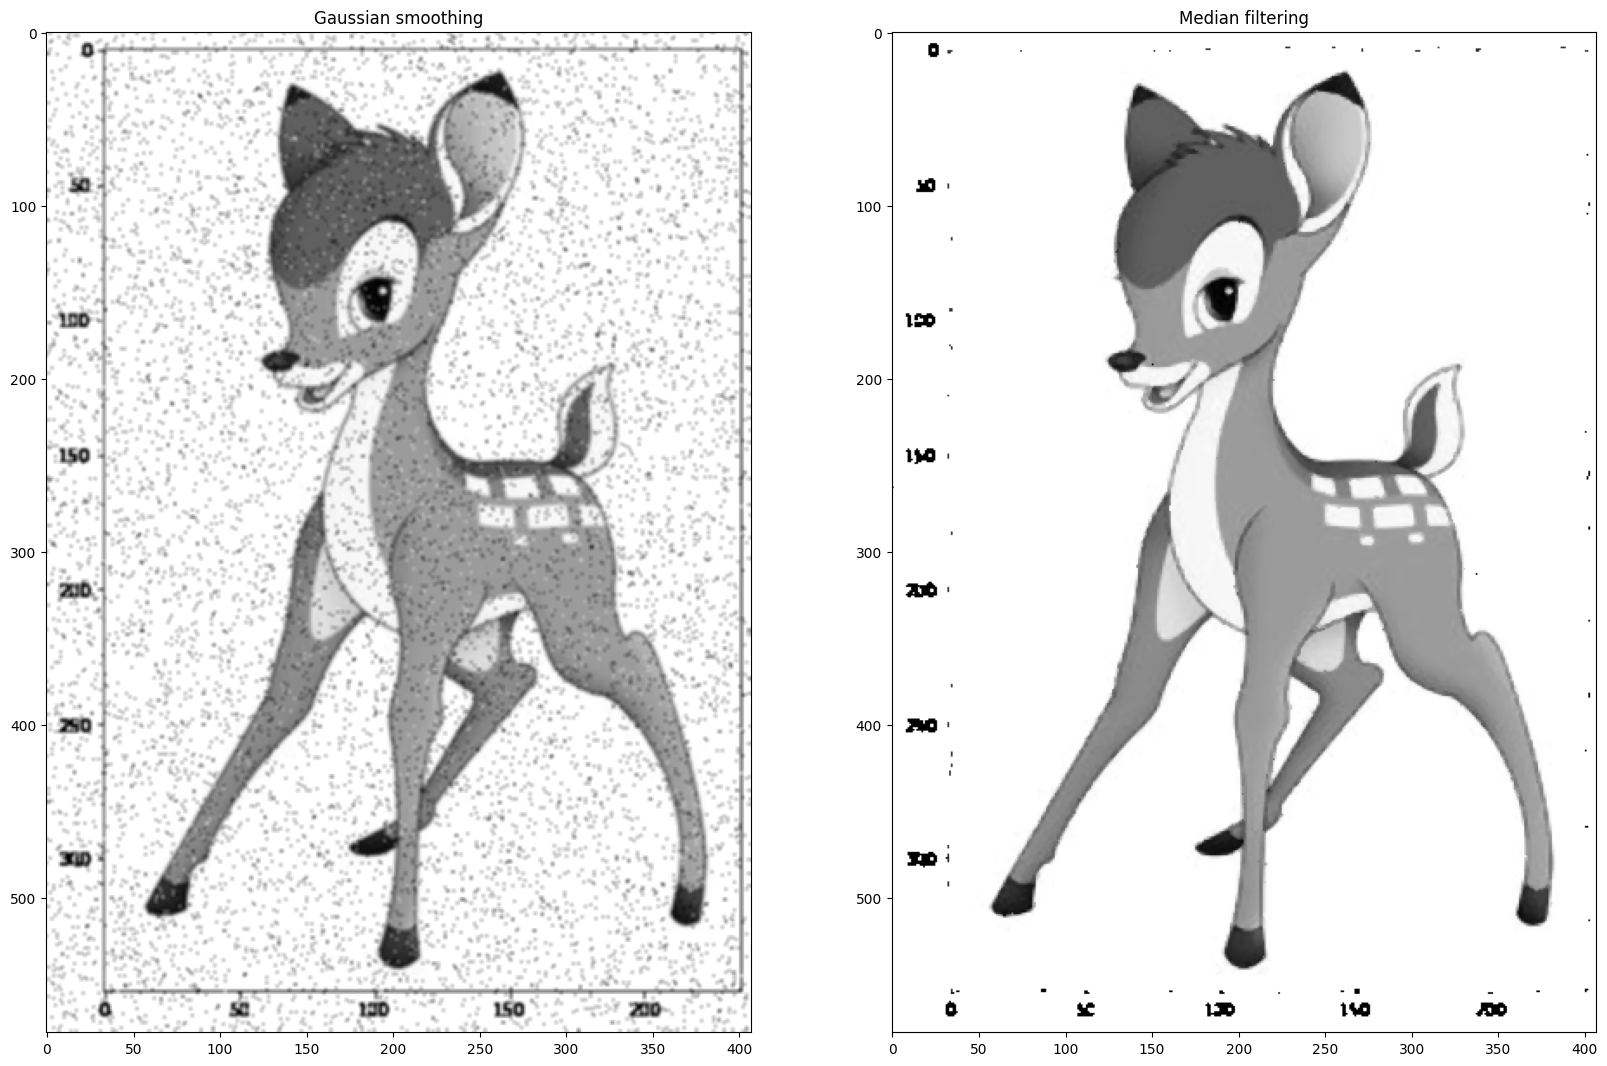

In [29]:
# Median filtering in 2D
half_width = 1

plt.figure(figsize=(20,15))
plt.subplot(121)
plt.title('Gaussian smoothing')
plt.imshow(cv.GaussianBlur(im, (2*half_width+1, 2*half_width+1), sigma), cmap='gray')
plt.subplot(122)
plt.title('Median filtering')
plt.imshow(cv.medianBlur(im, 2*half_width+1), cmap='gray');